<a href="https://colab.research.google.com/github/kundyyy/100-Days-Of-ML-Code/blob/master/AfterWork_Data_Science_Feature_Engineering_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="blue">To use this notebook on Google Colaboratory, you will need to make a copy of it. Go to **File** > **Save a Copy in Drive**. You can then use the new copy that will appear in the new tab.</font>

# AfterWork Data Science: Feature Engineering

### Prerequisites

In [0]:
# Let's first import the libraries that we will need
# ----
#
import pandas as pd               # pandas for performing data manipulation
import numpy as np                # numpy for performing scientific computations
import matplotlib.pyplot as plt   # matplotlib for performing visualisation 

## Feature Improvement Techniques

#### <font color="blue">Example: Standardisation & Normalisation</font>

In [0]:
# Example
# --- 
# Question: Using the Support Vector Regressor, create a regression model using the clean dataset below.
# ---
# Dataset url = http://bit.ly/FishDatasetClean
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Dataset

In [0]:
# Loading our dataset
# ---
# 
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Describing our dataset
# ---
# 
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 2, 3, 4: Checking, Cleaning, Exploratory Analysis and have already been performed on our dataset.

##### Step 5. Implementation and Evaluation

We will now perform normalisation and standardisation techniques to our dataset then fit the data to various models. We can then compare out RMSE accuracy in different instances. Go through each of the given models to understand the effect on these two techniques. Remember to uncomment the relevant cells.

In [0]:
# First we check for modeling without without standardisation and normalisation
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42) 

# Fitting in our models
# - Don't wory about the model parameters, we will just need to keep them constant
# in our examples below. We will learn more about parameters in hyperparameter tuning. 
# ---
from sklearn.svm import SVR  

svm_regressor = SVR()
# knn_regressor = KNeighborsRegressor(3)
# dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
# knn_regressor.fit(X_train, y_train)
# dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
# knn_y_pred = knn_regressor.predict(X_test)
# dec_y_pred = knn_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
# print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
# print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 335.2032534418768


In [0]:
# First we check for modeling with only standardisation
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing  standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

# Fitting in our models    
svm_regressor = SVR()
# knn_regressor = KNeighborsRegressor(3)
# dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
# knn_regressor.fit(X_train, y_train)
# dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
# knn_y_pred = knn_regressor.predict(X_test)
# dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
# print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
# print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 343.80059478097775


In [0]:
# We then check for modeling with only normalisation
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models  
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

svm_regressor = SVR()
# knn_regressor = KNeighborsRegressor(3)
# dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
# knn_regressor.fit(X_train, y_train)
# dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
# knn_y_pred = knn_regressor.predict(X_test)
# dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
# print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
# print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 343.37422455919005


In [0]:
# We then check for modeling with both standardisation and normalisation
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing  standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models  
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

svm_regressor = SVR()
knn_regressor = KNeighborsRegressor(3)
# dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
# dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
# dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
# print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 274.3446417679723
KNN RMSE: 106.14833425796535


#### <font color="green">Challenge</font>

In [0]:
# Challenge 1
# ---
# You can now work on the following dataset that you've used in the past to apply 
# the scaling techniques in an effort improve accuracy.
# Create a regression model to predict price using the given dataset examining
# the two scaling techniques for the different regressors. 
# NB: You can apply the other regression technique that we did not use i.e.
# Multiple linear regression.
# ---
# Dataset url = http://bit.ly/RealEstateDataset2
# ---
# OUR CODE GOES BELOW
#

#### <font color="green">Challenge 2</font>

In [0]:
# Challenge 2
# ---
# Again, you've already gone this classification problem. 
# Build a classifier to predict car sales, check the accuracy of the prediction then challenge 
# your solution by apply feature improvement techniques to  following dataset
# ---
# Dataset url = https://bit.ly/3dvU2BB
# ---
# OUR CODE GOES BELOW
#

## Feature Selection Techniques

#### <font color="blue">Example: Pearson's Correlation Coefficient</font>

In [0]:
# Example
# --- 
# Question: Let's use the following dataset that we used above.
# We will use the pearson's correlation coefficient as our filtering method.
# ---
# Dataset url = http://bit.ly/FishDatasetClean
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Dataset

In [0]:
# Loading our dataset
# ---
# 
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Describing our dataset
# ---
# 
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 2, 3, 4: Checking, Cleaning, Exploratory Analysis and have already been performed on our dataset.

##### Step 5. Implementation and Evaluation

In this example we will only use the pearson's correlation coefficient to resolve the most important features in a dataset. In our case we will drop features that are not highly correlated to our response variable.


In [0]:
# First, we then perform modeling with both standardisation and normalisation.
# We will use this as as our base for our solution, then perform feature engineering 
# by filter methods.
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing  standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models  
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

svm_regressor = SVR()
knn_regressor = KNeighborsRegressor(3)
# dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
# dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
# dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
# print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 342.6060092434742
KNN RMSE: 63.160562406603994


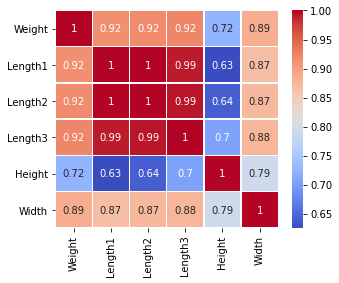

In [0]:
# Then appply filter methods by plotting a correlation matrix
# ---
#
df_corr = df.corr()
plt.figure(figsize=(5,4))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');

We resolve to drop height since it has a weaker correlation to Weight, which is our response variable.

In [0]:
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Then perform our modeling, comparing the resulting accuracy to the previous base solution.
# ---
# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing  standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test) 

# Fitting in our models  
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

svm_regressor = SVR()
knn_regressor = KNeighborsRegressor(3)
# dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
# dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
# dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
# print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 345.06298861276656
KNN RMSE: 50.06843372381001


#### <font color="blue">Example: Recursive Feature Elimination</font>

In [0]:
# Example
# --- 
# Question: Let's use the following dataset that we used above in our example to
# use recursive feature elimination as our filtering method.
# --
# The Recursive Feature Elimination (RFE) method is a feature selection approach which 
# works by recursively removing attributes and building a model on those attributes that remain. 
# It uses the model accuracy to identify which attributes (and combination of attributes) 
# contribute the most to predicting the target attribute.
# ---
# Dataset url = http://bit.ly/FishDatasetClean
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Dataset

In [0]:
# Loading our dataset
# ---
# 
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Describing our dataset
# ---
# 
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 2, 3, 4: Checking, Cleaning, Exploratory Analysis and have already been performed on our dataset.

##### Step 5. Implementation and Evaluation

In [0]:
# First, we then perform modeling with both standardisation and normalisation.
# We will use this as our base for our solution, then perform feature engineering 
# by filter methods.
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing  standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models  
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

svm_regressor = SVR(kernel="linear")   
dec_regressor = DecisionTreeRegressor()

# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
svm_regressor = RFE(svm_regressor, n_features_to_select = 3, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 3, step=1)

svm_regressor.fit(X_train, y_train) 
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))) 
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
 
# Displaying our best features
print('SVM Selected features: %s' % list(X.columns[svm_regressor.support_]))
print('Decision Tree Selected features: %s' % list(X.columns[dec_regressor.support_]))

SVM RMSE: 350.9406137824995
Decision Tree RMSE: 78.93107826287907
SVM Selected features: ['Length3', 'Height', 'Width']
Decision Tree Selected features: ['Length2', 'Length3', 'Width']


#### <font color="blue">Example: Principal Component Analysis</font>

In [0]:
# Example
# --- 
# Question: Let's use the following dataset that we used above in our example to
# use the principal component analysis (PCA) to reduce our features into components.
# ---

# ---
# Dataset url = http://bit.ly/FishDatasetClean
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Dataset

In [0]:
# Loading our dataset
# ---
# 
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Describing our dataset
# ---
# 
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 2, 3, 4: Checking, Cleaning, Exploratory Analysis and have already been performed on our dataset.

##### Step 5. Implementation and Evaluation

In [0]:
# Again, create our base models and check for the accuracy to later compare it
# later with our PCA implementation.
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)
 
# Fitting in our models  
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

svm_regressor = SVR()
knn_regressor = KNeighborsRegressor(3)
dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 347.26232837014646
KNN RMSE: 60.952747902386264
Decision Tree RMSE: 72.33531151288882


In [0]:
# Again, create our base models and check for the accuracy to later compare it
# later with our PCA implementation.
# ---

# We select our features
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Applying PCA
# ---
# NB: PCA relies the feature set and not the label data.
# ---
# 
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models  
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

svm_regressor = SVR()
knn_regressor = KNeighborsRegressor(3)
dec_regressor = DecisionTreeRegressor()

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 345.57672263118855
KNN RMSE: 60.952747902386264
Decision Tree RMSE: 154.470800234219


#### <font color="green">Challenge 1</font>

In [0]:
# Challenge 1
# ---
# Perfom the above feature selection techniques to imporove the accuracy of 
# the model use to predict prices in the previously used realestate dataset.
# ---
# Dataset url = http://bit.ly/RealEstateDataset2
# ---
# OUR CODE GOES BELOW
#

#### <font color="green">Challenge: Linear Discriminant Analysis</font>

In [0]:
# Challenge 1
# ---
# From Day 1, we have held your hand in providing for examples that you'd learn from 
# in order to work on the challenges. This time we would like you to refer to the 
# LDA sklearn documentation (Google) and then later perform LDA to the following dataset with the
# main goal of improving the accuracy of your model.   
# ---
# Dataset url = http://bit.ly/2So1eGk
# ---
# OUR CODE GOES BELOW
#